In [1]:
%load_ext autoreload
%autoreload 2
!RUST_BACKTRACE=1 cargo run -- ../models/rover.mo -t ../templates/casadi_daebuilder.jinja > gen/rover_casadi_daebuilder.py

    Finished ]8;;https://doc.rust-lang.org/cargo/reference/profiles.html#default-profiles\`dev` profile [unoptimized + debuginfo]]8;;\ target(s) in 0.08s
     Running `/home/jgoppert/git/rumoca/target/debug/rumoca ../models/rover.mo -t ../templates/casadi_daebuilder.jinja`


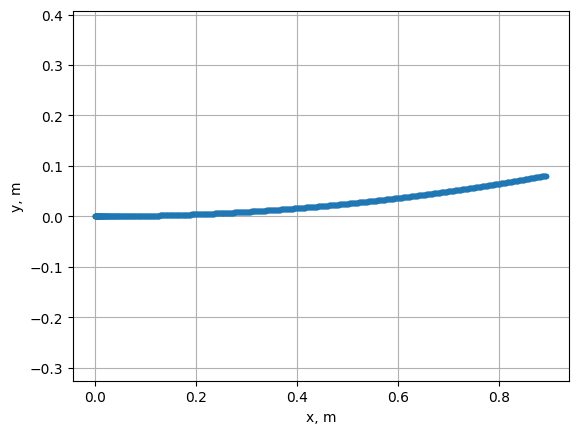

In [38]:
import gen.rover_casadi_daebuilder as rover
import numpy as np
import matplotlib.pyplot as plt

model = rover.Model('rover')
thr = 1.0 # commanded velocity in m/s
str = 0.1 # radians
# input [steering, throttle]
tgrid, res = model.simulate(t0=0, tf=10, dt=0.01, f_u=[str, thr])

xf = np.array(res['xf'])
plt.figure()
# states: motor, theta, x, y, z
plt.plot(xf[2, :], xf[3, :], '.')
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.axis('equal')
plt.grid()


In [39]:
try:
    import rover_node
    rover_node.run()
    print('done')
except ImportError as e:
    print("rover_node import error e, skipping ROS node", e)
    pass

done


For visualization: In  another terminal run:

```bash
ros2 run rviz2 rviz2 --ros-args -p use_sim_time:=true
```m

Add rover_pose to view.


For control: In  another terminal run:

```bash
ros2 run joy joy_node --ros-args -p use_sim_time:=true
```